In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

data = pd.read_csv(r"team2\Dataset1\train10.csv")
x = data["x"]
y = data["y"]

10


In [ ]:

def help(x, deg, y):
    phi = np.ones((len(x), deg+1))
    for i in range(1, deg+1):
        phi[:, i] = np.power(x, i)
    return  np.matmul(np.matmul(np.linalg.inv(np.matmul(phi.T, phi)), phi.T), y)

def predict(x, deg, w):
    phi = np.ones((len(x), deg+1))
    for i in range(1, deg+1):
        phi[:, i] = np.power(x, i)
    return np.matmul(phi, w)

def solve(deg, x, y):
    w = help(x, deg, y)
    l = min(x)
    r = max(x)
    x_samp = np.linspace(l, r, 100)
    y_pred = predict(x_samp, deg, w)

    plt.scatter(x, y, c="blue")
    plt.plot(x_samp, y_pred)


def help2(x, deg, lam, y):
    phi = np.ones((len(x), deg+1))
    for i in range(1, deg+1):
        phi[:, i] = np.power(x, i)
    return  np.matmul(np.matmul(np.linalg.inv(lam*np.identity(deg+1) + np.matmul(phi.T, phi)), phi.T), y)

def solve(deg, x, y, lam):
    w = help2(x, deg, lam, y)
    l = min(x)
    r = max(x)
    x_samp = np.linspace(l, r, 100)
    y_pred = predict(x_samp, deg, w)

    plt.scatter(x, y, c="blue")
    plt.plot(x_samp, y_pred)




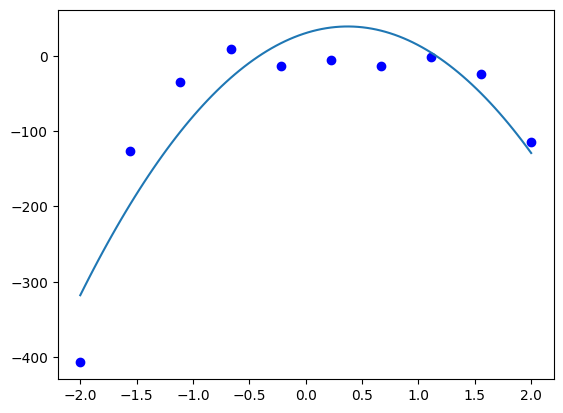

In [53]:
solve(2, x, y)

In [54]:
y_exp =predict(x, 2, w)

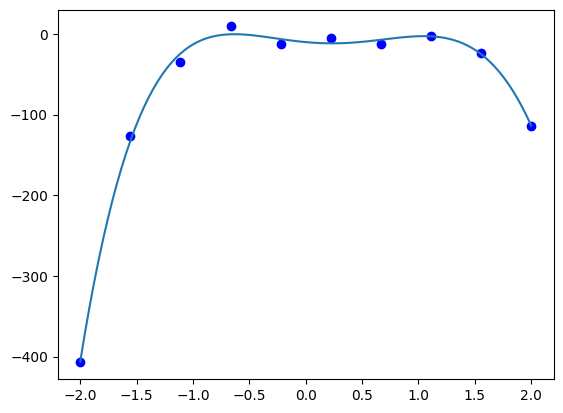

In [56]:
solve(5, x, y, 0.01)

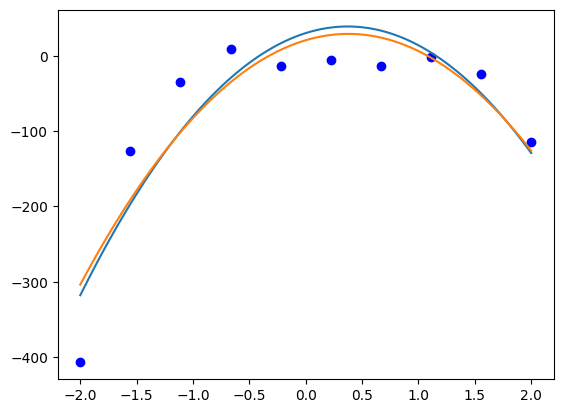

In [ ]:


w_normal = help(x, 2, y)
w_reg = help2(x, 2, 1, y)
l = min(x)
r = max(x)
x_samp = np.linspace(l, r, 100)
y_pred_norm = predict(x_samp, 2, w_normal)
y_pred_reg = predict(x_samp, 2, w_reg)

plt.scatter(x, y, c="blue")
plt.plot(x_samp, y_pred_norm)
plt.plot(x_samp, y_pred_reg)